# taxi time

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames
# Pretty display for notebooks
%matplotlib inline

In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.shape

(1458644, 11)

In [5]:
df.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663


In [41]:
df['pickup_datetime'][0]

'2016-03-14 17:24:55'

In [44]:
from datetime import datetime
datestring = df['pickup_datetime'][0]
dt = datetime.strptime(datestring, '%Y-%m-%d %H:%M:%S')
print dt.year, dt.month, dt.day


2016 3 14


In [48]:
def get_year( time_string):
    dt = datetime.strptime(time_string, '%Y-%m-%d %H:%M:%S')
    return dt.year
    

In [52]:
def get_month( time_string):
    dt = datetime.strptime(time_string, '%Y-%m-%d %H:%M:%S')
    return dt.month

In [53]:
def get_day( time_string):
    dt = datetime.strptime(time_string, '%Y-%m-%d %H:%M:%S')
    return dt.day

In [50]:
df['pickup_year'] = df['pickup_datetime'].apply(get_year)

In [54]:
df['pickup_month'] = df['pickup_datetime'].apply(get_month)

In [55]:
df['pickup_day'] = df['pickup_datetime'].apply(get_day)

In [59]:
import datetime
datetime.datetime.strptime(df['pickup_datetime'][100], '%Y-%m-%d %H:%M:%S').strftime('%A')


'Wednesday'

In [6]:
df_small = df[['vendor_id','passenger_count','trip_duration']]

In [34]:
np.unique(df_small.vendor_id)

array([1, 2])

In [35]:
np.unique(df_small.passenger_count)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

{'boxes': [<matplotlib.lines.Line2D at 0x7f76a6cccf50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f76a2f17d50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f76a2f2d090>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f76a2f23a10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f76a2f17050>,
  <matplotlib.lines.Line2D at 0x7f76a2f17710>]}

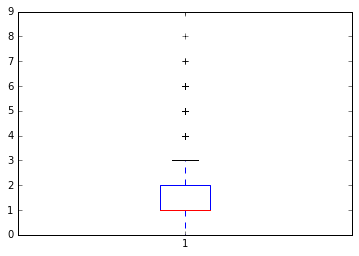

In [36]:
plt.boxplot(df_small['passenger_count'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f76b7eca4d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f76b1e84210>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f76b1e8f510>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f76b1e84e90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f76b1e3a4d0>,
  <matplotlib.lines.Line2D at 0x7f76b1e3ab90>]}

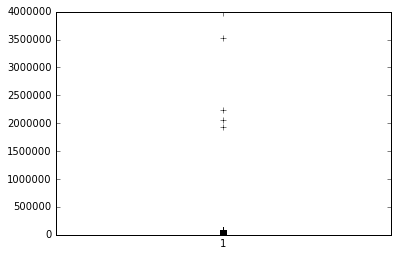

In [11]:
plt.boxplot(df_small['trip_duration'])


(array([  1.45658900e+06,   7.00000000e+01,   5.00000000e+01,
          1.93100000e+03,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

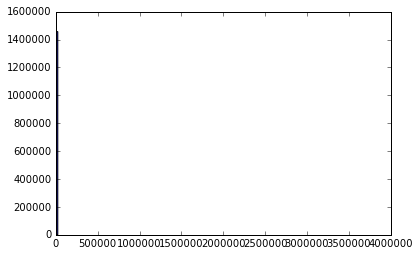

In [16]:
plt.hist(df_small['trip_duration'], bins =150)

In [17]:
df_small['trip_duration'].describe()

count    1.458644e+06
mean     9.594923e+02
std      5.237432e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

In [28]:
trip_duration_q2=np.percentile(df_small.trip_duration.values,2)

In [29]:
trip_duration_q98=np.percentile(df_small.trip_duration.values,98)

In [30]:
df_small_wo_outlier = df_small [ np.logical_and (df_small.trip_duration >trip_duration_q2 
          , df_small.trip_duration <trip_duration_q98)]

(array([ 11382.,  13370.,  16056.,  17768.,  19593.,  21454.,  22391.,
         24362.,  24697.,  25755.,  25772.,  26745.,  26681.,  27271.,
         26818.,  26806.,  27118.,  26541.,  26568.,  26037.,  25909.,
         25269.,  24972.,  24646.,  24210.,  23620.,  23155.,  22657.,
         22037.,  21524.,  22301.,  20564.,  20058.,  19620.,  18860.,
         18596.,  17850.,  17431.,  17103.,  16474.,  16301.,  15565.,
         15473.,  14804.,  14213.,  13931.,  13486.,  13225.,  12777.,
         12090.,  11886.,  11555.,  11205.,  10598.,  10452.,  10183.,
          9857.,   9824.,   9244.,   9025.,   9164.,   8523.,   8018.,
          7931.,   7651.,   7347.,   7040.,   6888.,   6822.,   6395.,
          6413.,   6151.,   5902.,   5693.,   5574.,   5497.,   5203.,
          5126.,   4941.,   4795.,   4569.,   4393.,   4305.,   4080.,
          4072.,   3710.,   3709.,   3650.,   3593.,   3670.,   3287.,
          3180.,   3109.,   2960.,   2925.,   2880.,   2795.,   2666.,
      

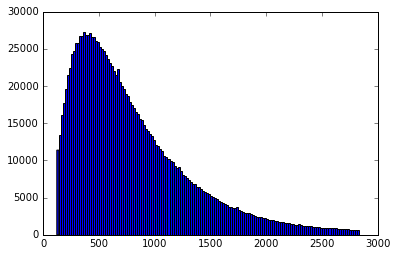

In [31]:
plt.hist(df_small_wo_outlier['trip_duration'], bins =150)

(array([  1659.,   1647.,   1142.,   1818.,   2007.,   1824.,   1976.,
          2065.,   2131.,   2247.,   2244.,   3195.,   2449.,   2530.,
          3531.,   2763.,   3625.,   3761.,   2974.,   4015.,   3862.,
          4034.,   4216.,   5475.,   4350.,   4291.,   5820.,   4743.,
          5989.,   6054.,   6050.,   6146.,   6283.,   6389.,   6643.,
          8227.,   6806.,   8023.,   6980.,   8300.,   8516.,   8516.,
         10058.,   8629.,   9937.,   8660.,  10517.,  10288.,  10129.,
         10494.,  11998.,  10620.,  12182.,  12032.,  11889.,  11800.,
         11947.,  13401.,  13705.,  13354.,  13323.,  13397.,  13201.,
         14670.,  14513.,  14471.,  14282.,  15598.,  15289.,  15409.,
         15241.,  14906.,  16301.,  15959.,  15819.,  16722.,  15348.,
         16218.,  17197.,  15597.,  16755.,  16313.,  17057.,  15912.,
         16410.,  17267.,  15681.,  16354.,  16867.,  15526.,  16126.,
         16620.,  16252.,  15862.,  15351.,  15801.,  15826.,  14691.,
      

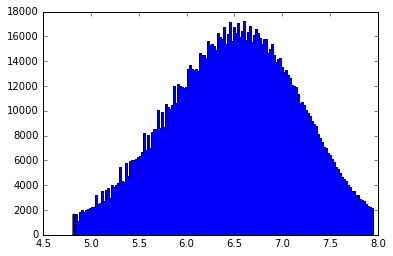

In [33]:
plt.hist(np.log(df_small_wo_outlier['trip_duration'].values), bins =150)